<a href="https://colab.research.google.com/github/spaceml-org/Curator-Unlabeled-Image-Search-Guide/blob/main/notebooks/Index_API_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Model File & Dataset

Required Files:
*   pt format model file
*   zipped directory of images



In [1]:
#Download a sample dataset
!wget https://raw.githubusercontent.com/spaceml-org/Curator-Unlabeled-Image-Search-Guide/main/samples/index_api_samples/index_api_sample_dataset.zip

#Download a sample model
!wget https://raw.githubusercontent.com/spaceml-org/Curator-Unlabeled-Image-Search-Guide/main/samples/index_api_samples/index_api_sample_model.pt

--2021-09-22 03:18:08--  https://raw.githubusercontent.com/spaceml-org/Curator-Unlabeled-Image-Search-Guide/main/samples/index_api_samples/index_api_sample_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11145264 (11M) [application/zip]
Saving to: ‘index_api_sample_dataset.zip’

index_api_sample_da 100%[===================>]  10.63M  --.-KB/s    in 0.1s    

2021-09-22 03:18:08 (93.9 MB/s) - ‘index_api_sample_dataset.zip’ saved [11145264/11145264]

--2021-09-22 03:18:09--  https://raw.githubusercontent.com/spaceml-org/Curator-Unlabeled-Image-Search-Guide/main/samples/index_api_samples/index_api_sample_model.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to ra

In [2]:
#Unzip image directory. Make sure images are inside a folder within the directory. EX: folder/folder2/images*.jpeg
!unzip index_api_sample_dataset.zip

Archive:  index_api_sample_dataset.zip
   creating: sample-1024-0.5-resized256/
   creating: sample-1024-0.5-resized256/2020-08-15/
  inflating: sample-1024-0.5-resized256/2020-08-15/2020-08-15_-00038.0,-000.1081,-35.6937,0002.1982.jpeg  
  inflating: sample-1024-0.5-resized256/2020-08-15/2020-08-15_-00038.0,-000052.0,-35.6937,-049.6937.jpeg  
  inflating: sample-1024-0.5-resized256/2020-08-15/2020-08-15_-00038.0,-000180.0,-35.6937,-177.6937.jpeg  
  inflating: sample-1024-0.5-resized256/2020-08-15/2020-08-15_-00038.0,-0007.027,-35.6937,-004.7207.jpeg  
  inflating: sample-1024-0.5-resized256/2020-08-15/2020-08-15_-00038.0,-001.2613,-35.6937,00001.045.jpeg  
  inflating: sample-1024-0.5-resized256/2020-08-15/2020-08-15_-00038.0,-002.4144,-35.6937,-000.1081.jpeg  
  inflating: sample-1024-0.5-resized256/2020-08-15/2020-08-15_-00038.0,-0022.018,-35.6937,-019.7117.jpeg  
  inflating: sample-1024-0.5-resized256/2020-08-15/2020-08-15_-00038.0,-003.5676,-35.6937,-001.2613.jpeg  
  inflating:

# Install Dependencies

In [3]:
#installs
!pip install -q split-folders
!pip install -q torch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 torchtext==0.6.0
!pip install -q pytorch-lightning==1.1.8
!pip install -q pytorch-lightning-bolts
!pip install -q --extra-index-url https://developer.download.nvidia.com/compute/redist nvidia-dali-cuda100
!pip install -q wandb

     |████████████████████████████████| 776.8 MB 19 kB/s 
     |████████████████████████████████| 12.8 MB 23 kB/s 
     |████████████████████████████████| 7.6 MB 39.9 MB/s 
     |████████████████████████████████| 64 kB 2.4 MB/s 
     |████████████████████████████████| 1.2 MB 37.7 MB/s 
     |████████████████████████████████| 696 kB 5.3 MB/s 
     |████████████████████████████████| 829 kB 33.4 MB/s 
     |████████████████████████████████| 269 kB 44.6 MB/s 
     |████████████████████████████████| 119 kB 46.3 MB/s 
     |████████████████████████████████| 1.3 MB 35.6 MB/s 
     |████████████████████████████████| 142 kB 48.4 MB/s 
     |████████████████████████████████| 294 kB 43.4 MB/s 
     |████████████████████████████████| 253 kB 5.3 MB/s 
     |████████████████████████████████| 282 kB 41.5 MB/s 
     |████████████████████████████████| 391.8 MB 14 kB/s 
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 139 kB 45.6 MB/s 
     |██████████████

In [4]:
#Conda Install
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-09-22 03:21:32--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   134MB/s    in 0.6s    

2021-09-22 03:21:33 (134 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [5]:
#FAISS Installs
!conda install faiss-gpu cudatoolkit=10.0 -c pytorch -y # For CUDA10

Solving environment: - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.0
    - faiss-gpu


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    ca-certificates-2021.7.5   |       h06a4308_1         113 KB
    certifi-2021.5.30          |   py37h06a4308_0         139 KB
    conda-4.10.3               |   py37h06a4308_0         2.9 MB
    cudatoolkit-10.0.130       |                0       261.2 MB
    faiss-gpu-1.6.3            |   py37h1a5d453_0        34.2 MB  pytorch
    intel-openmp-2021.3.0      |    h06a4308_3350         1.4 MB
    mkl-2021.3.0               |     h06a4308_520       141.2 MB
    mkl-service-2.4.0          |   py37h7f8727e_0          56 KB
    mkl_fft-1.3.0              |   py37h42c9631_2         170 KB
    mkl_random-1.2.2

In [6]:
!rm -rf SSL
!git clone --branch simsiam https://github.com/spaceml-org/Self-Supervised-Learner.git
!mv Self-Supervised-Learner SSL

Cloning into 'Self-Supervised-Learner'...
remote: Enumerating objects: 2817, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (269/269), done.
remote: Total 2817 (delta 175), reused 38 (delta 21), pack-reused 2527
Receiving objects: 100% (2817/2817), 11.95 MiB | 27.38 MiB/s, done.
Resolving deltas: 100% (1765/1765), done.


In [7]:
import os
import sys
import csv
import torch
import faiss
import os
import numpy as np
import PIL.Image as Image
import time
import pickle
import re
import itertools
import shutil
import PIL
import matplotlib.pyplot as plt
from torch import nn
from tqdm.notebook import tqdm
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import argparse
from argparse import ArgumentParser

In [8]:
%cd /content/SSL
from models import SIMCLR, CLASSIFIER, SIMSIAM
%cd /content/

/content/SSL
/content


In [9]:
#from nvidia.dali.pipeline import Pipeline
from nvidia.dali import pipeline_def
import nvidia.dali.fn as fn
import nvidia.dali.types as types
from nvidia.dali.plugin.pytorch import DALIClassificationIterator

# Embedding Generation

In [10]:
#Function to get matrix of embeddings. Will be used on image directory
def get_matrix(MODEL_PATH, DATA_PATH, ckpt=True):
    def to_tensor(pil):
      return torch.tensor(np.array(pil)).permute(2,0,1).float()
    t = transforms.Compose([
                            transforms.Resize((64,64)),
                            transforms.Lambda(to_tensor)
                            ])
    dataset = ImageFolder(DATA_PATH, transform = t)
    if(ckpt):
      model = SIMCLR.SIMCLR.load_from_checkpoint(MODEL_PATH)
    else:
      model = torch.load(MODEL_PATH)
    model.eval()
    model.cuda()
    size = model.embedding_size
    with torch.no_grad():
        data_matrix = torch.empty(size = (0, size)).cuda()
        bs = 32
        if len(dataset) < bs:
          bs = 1
        loader = DataLoader(dataset, batch_size = bs, shuffle = False)
        for batch in tqdm(loader):
          x = batch[0].cuda()
          if(ckpt):
            embeddings = model(x)
          else:
            embeddings = model(x)[0]
          data_matrix = torch.vstack((data_matrix, embeddings))
    return np.asarray(data_matrix.cpu().detach().numpy()), [f[0] for f in dataset.imgs]

In [11]:
def get_embedding(MODEL_PATH, FILE_PATH):
  im = Image.open(FILE_PATH).convert('RGB')
  r = transforms.Resize((64,64))
  data = torch.tensor(np.array(im)).permute(2,0,1).float().unsqueeze(0)
  x = r(data)
  model = torch.load(MODEL_PATH)
  model.eval()
  model.cpu()
  embedding = model(x)
  return np.asarray(embedding[0].detach().numpy())

Change Paths here

In [12]:
model_path = '/content/index_api_sample_model.pt'
file_path = '/content/sample-1024-0.5-resized256'

In [13]:
start = time.time() #Time the function
embeddings, file_list = get_matrix(model_path, file_path, False)
end = time.time() #End Time
print("Time:", end - start)

  0%|          | 0/28 [00:00<?, ?it/s]

Time: 7.88551664352417


# Indexer Generation

In [14]:
#Generate a FAISS GPUS index
def generate_faiss(data):
  dimensions = data.shape[1]
  ngpus = faiss.get_num_gpus()
  print("number of GPUs:", ngpus)
  cpu_index = faiss.IndexFlatL2(dimensions)
  gpu_index = faiss.index_cpu_to_all_gpus(  
      cpu_index
  )
  gpu_index.add(data)
  return gpu_index

In [15]:
#Generate the embeddings for the image to be searched
start = time.time() #Time the function
indexer = generate_faiss(embeddings)
end = time.time() #End Time
print("Time:", end - start)

number of GPUs: 1
Time: 58.66794228553772


# Metadata Generation

This stuff you might have to change depending on what data you are using/ how the data is named. Currently takes the coordinates from the image names. You could store the image names here instead or even links to the google bucket.

In [16]:
import re

In [17]:
date = file_list[0][file_list[0].rfind('/')+1:].split('_')[0]

In [18]:
#Parses filenames
coordinates = []
#Date, BottomLeft Lat, BottomLeft Lon, TopRight Lat, TopRight Lon
for f in file_list:
  info = f[f.rfind('/')+1:-5]
  split_info = re.split('[_,]',info)
  coordinates.append(split_info)

In [19]:
main_name = date + '_viirs_256x256_250m'

In [20]:
#export coordinates
pickle_path = main_name + '_metadata.pickle'
pickle.dump(coordinates, open(pickle_path, 'wb'))

In [21]:
csv_path = main_name + '_metadata.csv'
np.savetxt(csv_path,coordinates,delimiter =", ",fmt ='% s') 

In [22]:
#Convert indexer back to CPU indexer in order to export
export_indexer = faiss.index_gpu_to_cpu(indexer)

In [23]:
#Export indexer
indexer_name = main_name + '.index'
faiss.write_index(export_indexer,indexer_name)

In [24]:
coordinates = pickle.load(open('/content/2020-08-15_viirs_256x256_250m_metadata.pickle', 'rb'))
indexer_name = ('/content/2020-08-15_viirs_256x256_250m.index')

In [25]:
len(coordinates)

878

# Test Search

In [26]:
#Load indexer
indexer2 = faiss.read_index(indexer_name)

In [27]:
image_to_search = '/content/sample-1024-0.5-resized256/2020-08-15/2020-08-15_-01.0991,-005.8739,001.2072,-003.5676.jpeg'
xq = get_embedding(model_path, image_to_search)

In [28]:
#Use the indexer to search. Distance = euclidian distances. smaller = more similar. Indices = indices of
k = 10         
distance, indices = indexer2.search(xq, k)

In [29]:
indices = indices[0]

In [30]:
indices

array([634, 627, 633, 636, 588, 659, 344, 590, 589, 658])

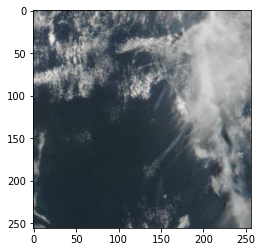

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(image_to_search))

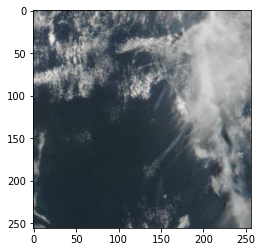

In [32]:
plt.imshow(mpimg.imread(file_list[indices[0]]))